# Introduction 💼🔨
In today's competitive telecommunications industry, customer retention has become a critical factor for sustainable business growth. The cost of acquiring new customers significantly outweighs the cost of retaining existing ones, making churn prediction an essential component of strategic business planning. This notebook presents a comprehensive analysis and modeling approach to predict customer churn for a telecommunications company using machine learning techniques.

The Telco Customer Churn dataset provides a rich foundation for understanding the factors that influence customer decisions to terminate their service subscriptions. By leveraging this dataset, we aim to develop a robust predictive model that can identify customers at high risk of churning, enabling proactive retention strategies before these customers decide to leave.

**The comprehensive process is about**
1. Loading Libraries and Data
2. Data Wragling - Understanding Data, Cleaning & Imputing Data
3. Exploratory Analysis (EDA) - Visualization and Identify Potential Relationships 
4. Feature Engineering, Scaling & Selection
5. Data Modeling
6. Models Evaluation

# 1. Loading libraries and data

In [1]:
import numpy as np 
import pandas as pd 
from IPython.display import display, HTML
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
!pip install imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [3]:
import warnings
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

# Preprocessing
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

# Training
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    RepeatedStratifiedKFold,
    cross_val_score,
    cross_val_predict,
    GridSearchCV,
    RandomizedSearchCV
)

# Metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    average_precision_score,
    roc_auc_score,
    roc_curve,
    auc
)

# Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier
)
from sklearn.linear_model import LogisticRegression

# Data Balancing
from imblearn.over_sampling import (
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE,
    RandomOverSampler
)

# Turn off warning
warnings.filterwarnings("ignore")

In [4]:
import sklearn
print(sklearn.__version__)
import imblearn
print(imblearn.__version__)

1.2.2
0.10.1


In [5]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 2. Data Wrangling

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isna().sum() # No null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.shape

(7043, 21)

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
# We check unique values for each column in df
columns = df.columns
print("******************* Numeric field *******************\n")
for i in range(len(columns)):
    if df[columns[i]].dtypes!=object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))
        
print("\n******************* Categorical field *******************\n")
for i in range(len(columns)): 
    if df[columns[i]].dtypes==object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

******************* Numeric field *******************

unique number of SeniorCitizen -> 2
unique number of tenure -> 73
unique number of MonthlyCharges -> 1585

******************* Categorical field *******************

unique number of customerID -> 7043
unique number of gender -> 2
unique number of Partner -> 2
unique number of Dependents -> 2
unique number of PhoneService -> 2
unique number of MultipleLines -> 3
unique number of InternetService -> 3
unique number of OnlineSecurity -> 3
unique number of OnlineBackup -> 3
unique number of DeviceProtection -> 3
unique number of TechSupport -> 3
unique number of StreamingTV -> 3
unique number of StreamingMovies -> 3
unique number of Contract -> 3
unique number of PaperlessBilling -> 2
unique number of PaymentMethod -> 4
unique number of TotalCharges -> 6531
unique number of Churn -> 2


In [11]:
df.describe().T # Not much outliers 

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [12]:
df.describe(include='object').T # Too many features with text data, Total charges should be in correct form

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [13]:
df['TotalCharges'] # We can see it is numerical values but stored in object type -> should convert

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [14]:
# Before we convert, we first check if there is blank characters, maybe we get
l1 = [len(i.split()) for i in df['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].fillna(df.TotalCharges.median()) #fill TotalCharges with median

df.drop(['customerID'], inplace=True, axis=1) #drop customer ID

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


In [15]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

for col in cat_cols:
    unique_vals = df[col].unique()
    value_counts = df[col].value_counts()
    
    print(f"\n🏷️  {col.upper()} ({len(unique_vals)} unique values)")
    print("=" * 50)
    
    for val in unique_vals:
        count = value_counts[val]
        percentage = (count / len(df)) * 100
        print(f"  • {val:<15} → {count:>5} records ({percentage:.1f}%)")



🏷️  GENDER (2 unique values)
  • Female          →  3488 records (49.5%)
  • Male            →  3555 records (50.5%)

🏷️  PARTNER (2 unique values)
  • Yes             →  3402 records (48.3%)
  • No              →  3641 records (51.7%)

🏷️  DEPENDENTS (2 unique values)
  • No              →  4933 records (70.0%)
  • Yes             →  2110 records (30.0%)

🏷️  PHONESERVICE (2 unique values)
  • No              →   682 records (9.7%)
  • Yes             →  6361 records (90.3%)

🏷️  MULTIPLELINES (3 unique values)
  • No phone service →   682 records (9.7%)
  • No              →  3390 records (48.1%)
  • Yes             →  2971 records (42.2%)

🏷️  INTERNETSERVICE (3 unique values)
  • DSL             →  2421 records (34.4%)
  • Fiber optic     →  3096 records (44.0%)
  • No              →  1526 records (21.7%)

🏷️  ONLINESECURITY (3 unique values)
  • No              →  3498 records (49.7%)
  • Yes             →  2019 records (28.7%)
  • No internet service →  1526 records (21.7%)

🏷️ 

In [16]:
#Convert No internet service -> No
cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[cols] = df[cols].replace('No internet service', 'No')

#Senior Citizen convert back to yes no to differentiate
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})
df['SeniorCitizen'].value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

In [17]:
total_dup = df.duplicated().sum() # Check duplicated and delete them
print(f'**Before Dropping Duplicates - {df.shape}**')
df = df.drop_duplicates()
print(f'**After Dropping {total_dup} Duplicates - {df.shape}**')

**Before Dropping Duplicates - (7043, 20)**
**After Dropping 22 Duplicates - (7021, 20)**


In [18]:
df.isna().sum() # Double check 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 3. EDA 
- We do this by first check label balance first ? then we delve into each column distribution group by label to understand the main relationships between these indepedent columns (features) with dependent one (label)
- For this part we just quick check EDA, and don't pay too much effort for EDA, but EDA discoveries deeply help us to find important features and relationship to train a good model 

Churn
No     73.550776
Yes    26.449224
Name: proportion, dtype: float64

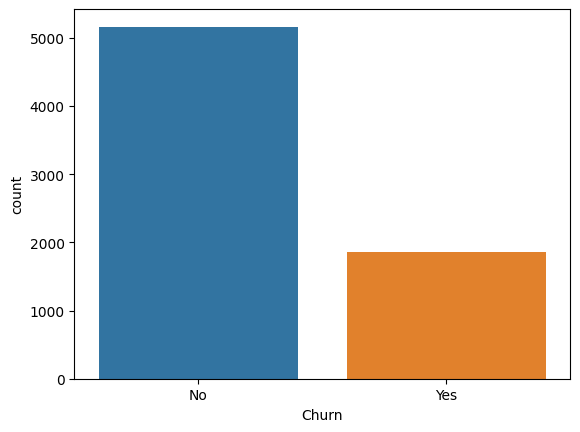

In [19]:
sns.countplot(x = "Churn", data=df)# We first check if the churn label balance or not 
df['Churn'].value_counts(normalize=True)*100 # The ratio for 'NO' is x3 higher than 'YES' label
# The dataset is kinda 
# To deal with this, we need to apply some smoothing techniques for better accuracy accross two classes
# -> RandomOverSampler
# -> SMOTE 


Demographic Analysis:


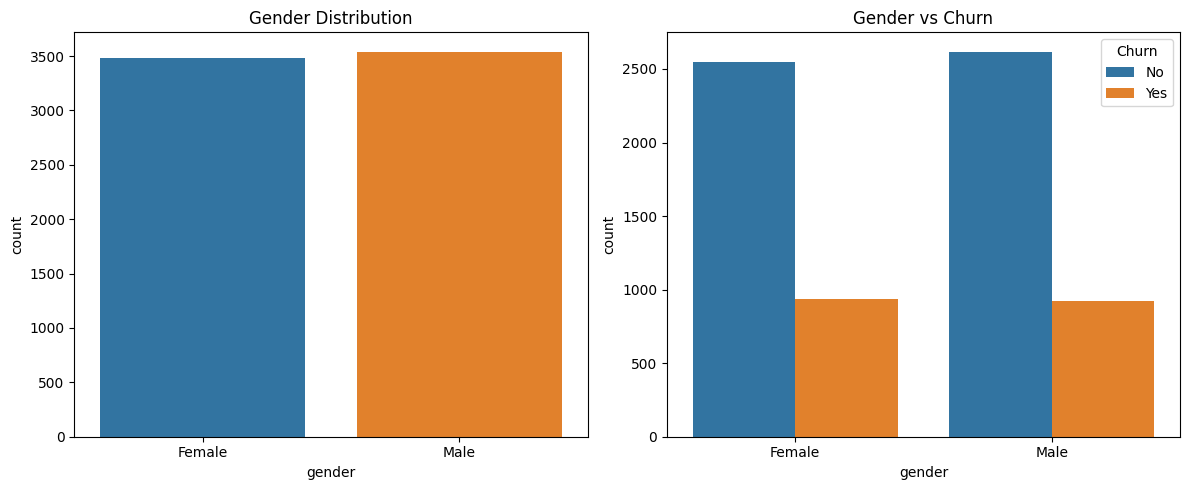

In [20]:
# Demographic Analysis
print("\nDemographic Analysis:")

# Gender and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Gender vs Churn')
plt.tight_layout()
plt.show()

# Kinda Balancing

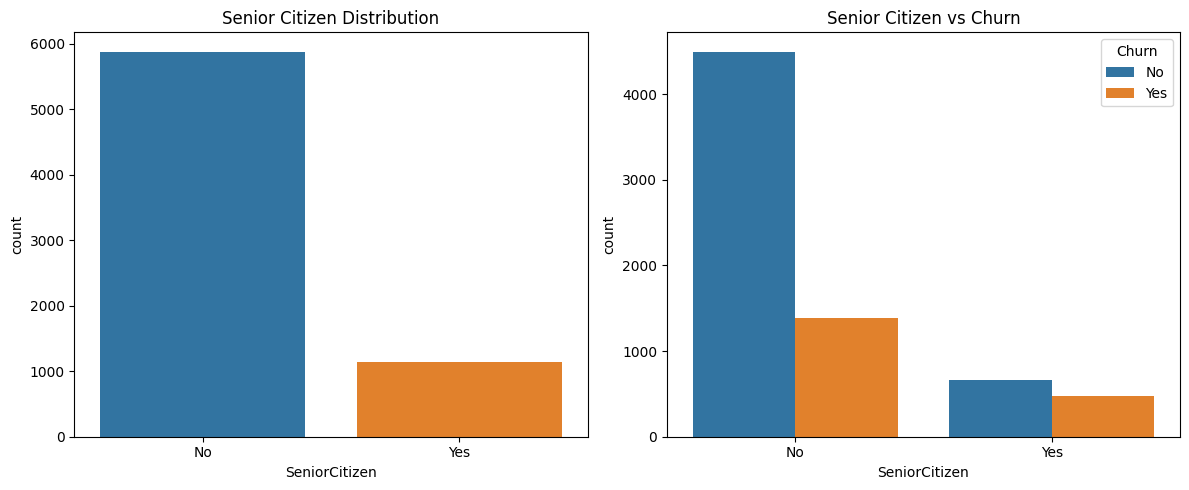

In [21]:
# Senior Citizen and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='SeniorCitizen', data=df)
plt.title('Senior Citizen Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Senior Citizen vs Churn')
plt.tight_layout()
plt.show()

# The gap between senior citezen and non is huge 
# Some how the churn rate of senior citizen is much higher than others

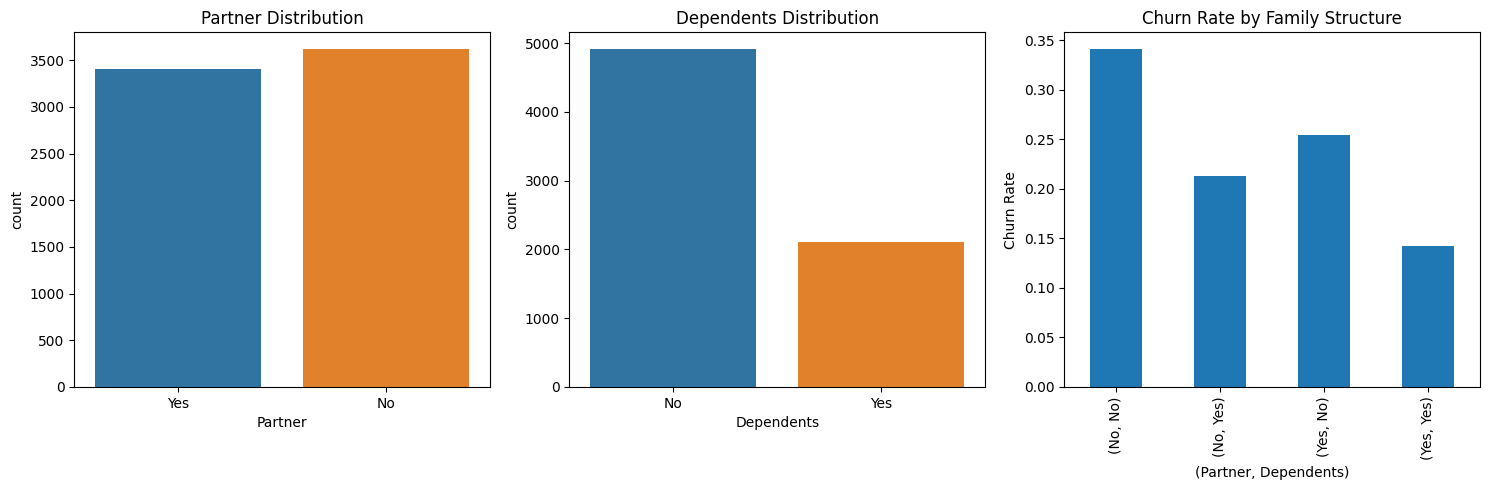

In [22]:
# Family Structure Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Partner', data=df)
plt.title('Partner Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='Dependents', data=df)
plt.title('Dependents Distribution')

plt.subplot(1, 3, 3)
partner_dependents = df.groupby(['Partner', 'Dependents'])['Churn'].value_counts(normalize=True).unstack()
partner_dependents['Yes'].plot(kind='bar')
plt.title('Churn Rate by Family Structure')
plt.xlabel('(Partner, Dependents)')
plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

# Churn rate for those have no partner and independents tend to be higher


Contract and Payment Analysis:


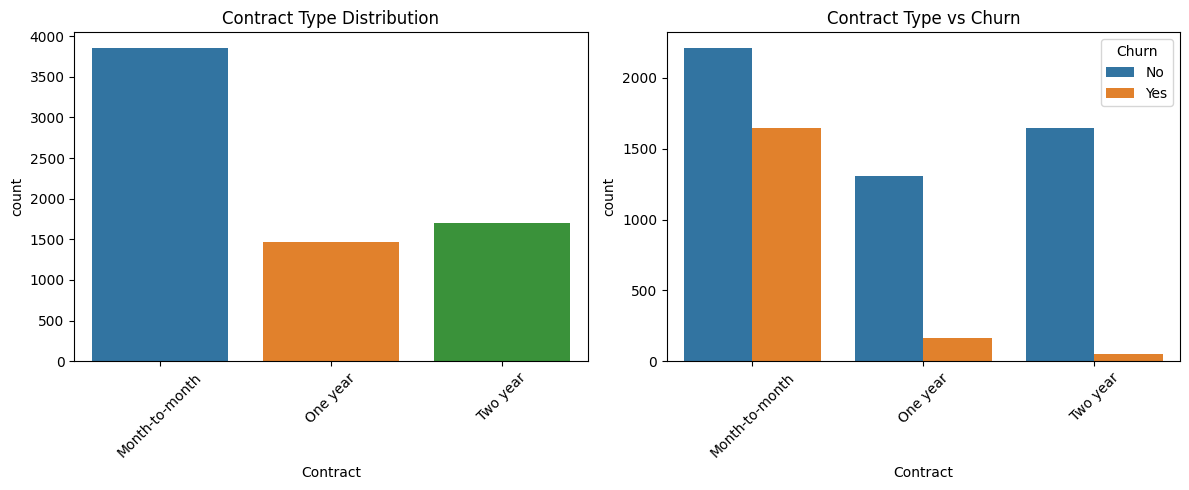

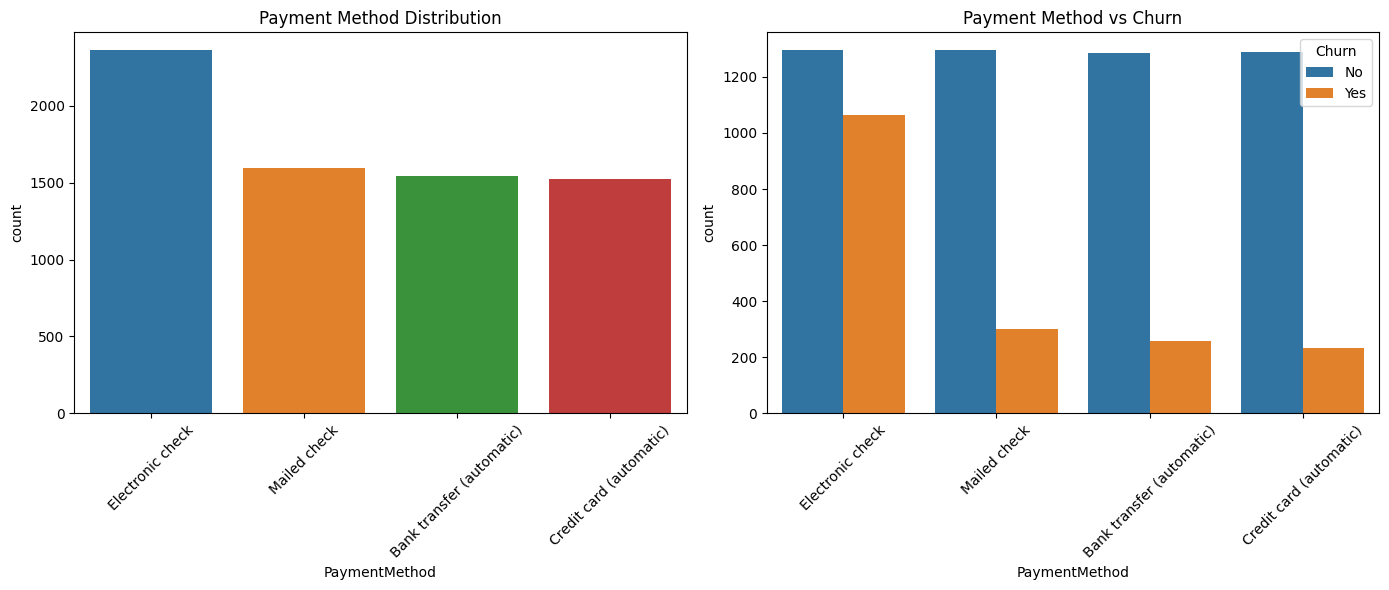

In [23]:
# Contract and Payment Analysis
print("\nContract and Payment Analysis:")

# Contract Type and Churn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Contract', data=df)
plt.title('Contract Type Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Payment Method and Churn
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='PaymentMethod', data=df)
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Payment Method vs Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Month-to-month is at good rate
# Electronic check is at good portion too

In [24]:
#It makes more sense to categorize customers wrt tenure, so let's convert tenure column to tenure range/buckets
def convert_to_buckets(tenure):
    if tenure <=24:
        return '0 - 24 months'
    elif tenure <=36:
        return '24 - 36 months'
    elif tenure <=48:
        return '36 - 48 months'
    elif tenure <=60:
        return '48 - 60 months'
    else:
        return '> 60 months'

In [25]:
df['tenure']=df['tenure'].map(convert_to_buckets)
df['tenure'].value_counts()

tenure
0 - 24 months     3188
> 60 months       1407
24 - 36 months     832
48 - 60 months     832
36 - 48 months     762
Name: count, dtype: int64

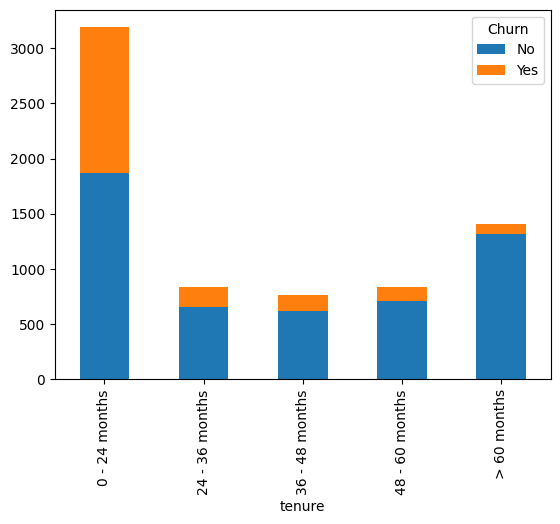

In [26]:
df.groupby(['tenure','Churn']).size().unstack().plot(kind='bar',stacked=True); #customers with 0-24 months tenure are more likely to churn.. 
#From the plot, it is evident that 'tenure' is an important feature as well./
plt.savefig('tenure.png', dpi=300, bbox_inches='tight')

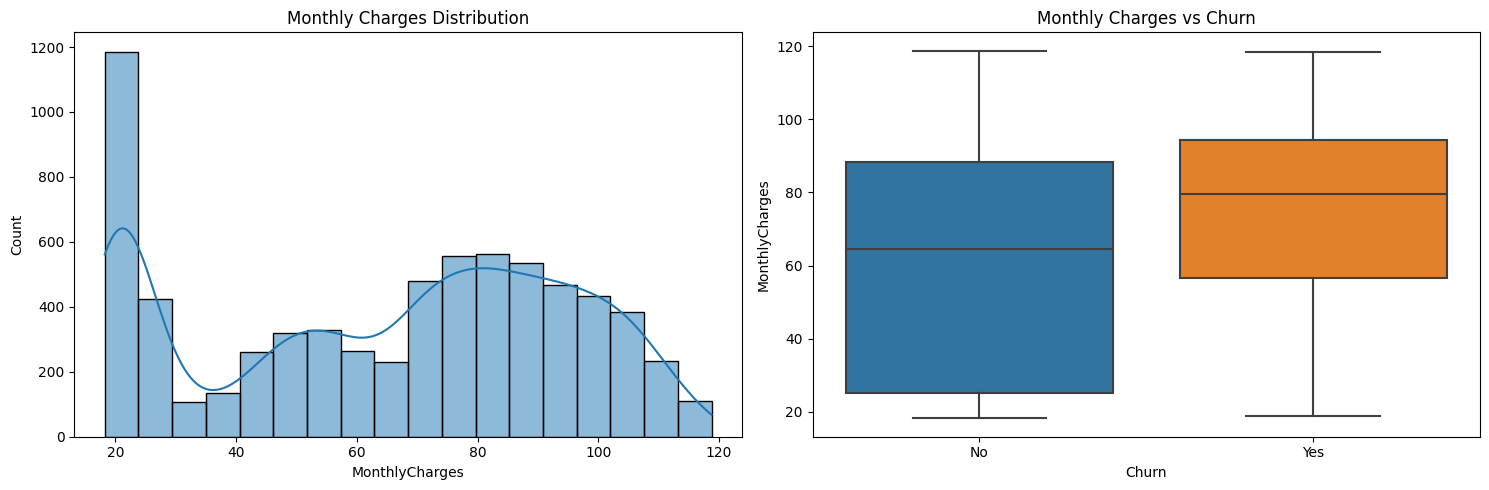

In [27]:
# Monthly Charges Distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')

plt.tight_layout()
plt.show()

# the distribution for monthly charges is not in bell-curve and the least charge is most prefered
# churning customers tend to pay higher ^^ 

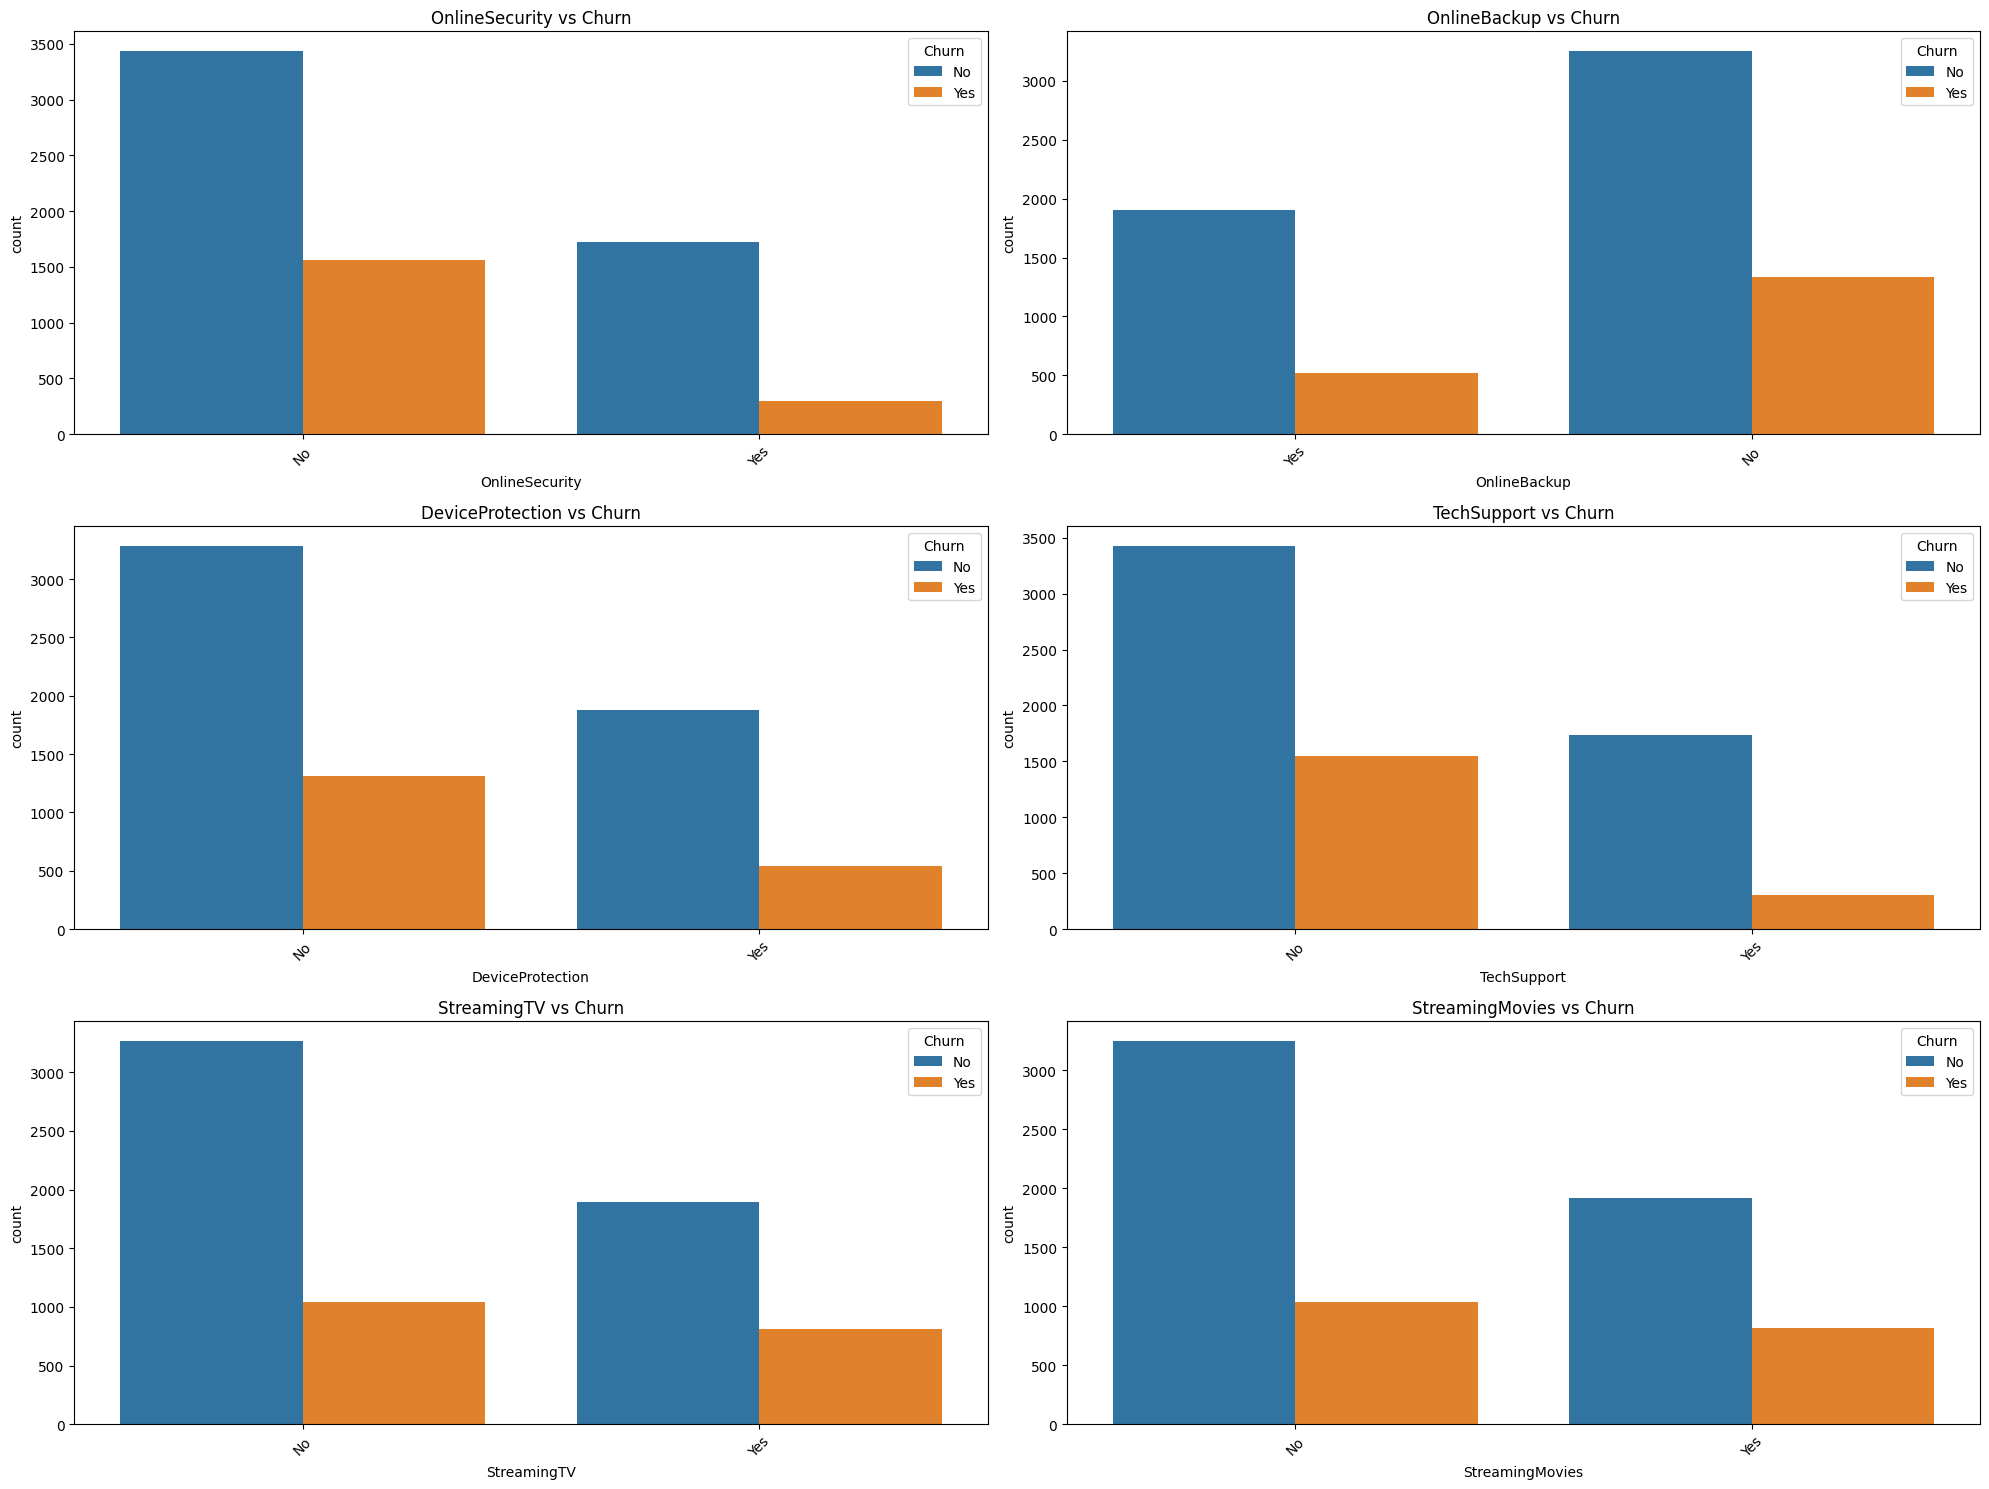

In [28]:
# Additional Services Analysis
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(20, 15))
for i, service in enumerate(additional_services, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=service, hue='Churn', data=df)
    plt.title(f'{service} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Most of the time, No paying to addtional services tend to have higher change of churn 

# 4. Feature Engineering and Scaling

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   object 
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [30]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

In [31]:
print(num_cols)
print(cat_cols)

['MonthlyCharges', 'TotalCharges']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [32]:
# Contract, Payment one-hot -> MULTI FEATURES
df = pd.get_dummies(df, columns=['Contract','PaymentMethod','InternetService'], drop_first=False, dtype=int)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,Female,No,Yes,No,0 - 24 months,No,No phone service,No,Yes,No,...,1,0,0,0,0,1,0,1,0,0
1,Male,No,No,No,24 - 36 months,Yes,No,Yes,No,Yes,...,0,1,0,0,0,0,1,1,0,0
2,Male,No,No,No,0 - 24 months,Yes,No,Yes,Yes,No,...,1,0,0,0,0,0,1,1,0,0
3,Male,No,No,No,36 - 48 months,No,No phone service,Yes,No,Yes,...,0,1,0,1,0,0,0,1,0,0
4,Female,No,No,No,0 - 24 months,Yes,No,No,No,No,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,0 - 24 months,Yes,Yes,Yes,No,Yes,...,0,1,0,0,0,0,1,1,0,0
7039,Female,No,Yes,Yes,> 60 months,Yes,Yes,No,Yes,Yes,...,0,1,0,0,1,0,0,0,1,0
7040,Female,No,Yes,Yes,0 - 24 months,No,No phone service,Yes,No,No,...,1,0,0,0,0,1,0,1,0,0
7041,Male,Yes,Yes,No,0 - 24 months,Yes,Yes,No,No,No,...,1,0,0,0,0,0,1,0,1,0


In [33]:
# label encoding -> BINARY FEATURES
le = LabelEncoder()
cat_cols.remove('Contract')
cat_cols.remove('PaymentMethod')
cat_cols.remove('InternetService')

df[cat_cols] = df[cat_cols].apply(lambda col: le.fit_transform(col)) 
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,2,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7021 non-null   int64  
 1   SeniorCitizen                            7021 non-null   int64  
 2   Partner                                  7021 non-null   int64  
 3   Dependents                               7021 non-null   int64  
 4   tenure                                   7021 non-null   int64  
 5   PhoneService                             7021 non-null   int64  
 6   MultipleLines                            7021 non-null   int64  
 7   OnlineSecurity                           7021 non-null   int64  
 8   OnlineBackup                             7021 non-null   int64  
 9   DeviceProtection                         7021 non-null   int64  
 10  TechSupport                              7021 non-nul

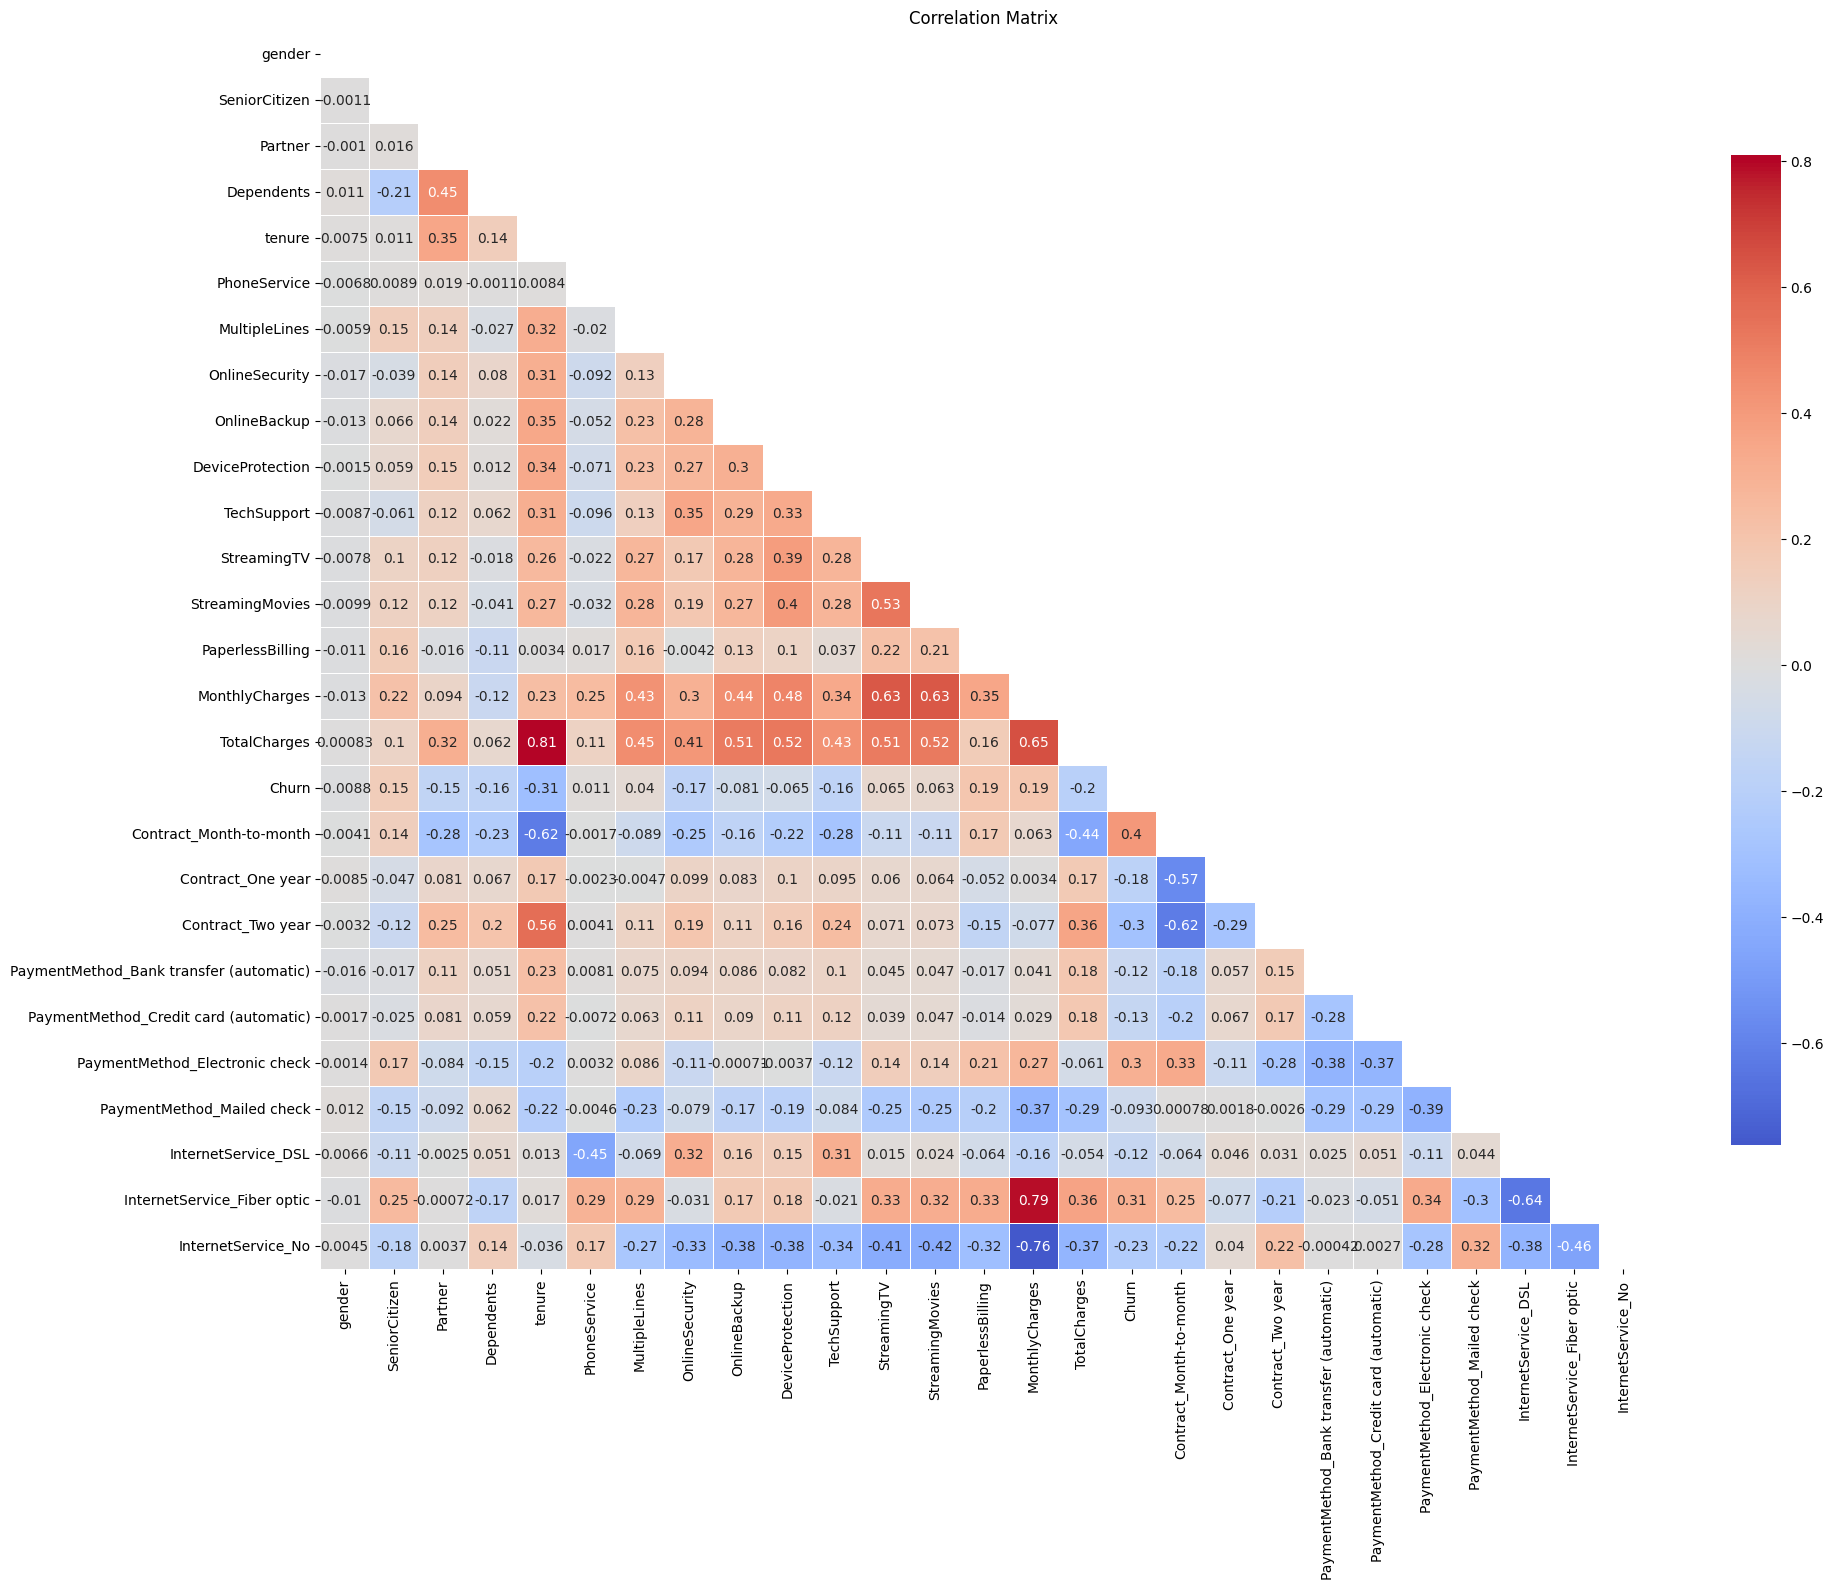

In [35]:
# Correlation matrix after encoding
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            linewidths=0.5, cbar_kws={"shrink": .8}, annot_kws={"fontsize":10}, center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [36]:
df.drop(['TotalCharges'], inplace=True, axis=1) #drop TotalCharge

In [37]:
num_cols.remove('TotalCharges')

In [38]:
# check correlation for each colum with label
df.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.404884
InternetService_Fiber optic                0.308170
PaymentMethod_Electronic check             0.301544
MonthlyCharges                             0.194508
PaperlessBilling                           0.190891
SeniorCitizen                              0.151619
StreamingTV                                0.065032
StreamingMovies                            0.063192
MultipleLines                              0.040175
PhoneService                               0.011323
gender                                    -0.008763
DeviceProtection                          -0.064944
OnlineBackup                              -0.081092
PaymentMethod_Mailed check                -0.092562
PaymentMethod_Bank transfer (automatic)   -0.117242
InternetService_DSL                       -0.124223
PaymentMethod_Credit card (automatic)     -0.133666
Partner                                   -0.149135
Dependents  

# 5. Modeling

## NO BALANCE TECHNIQUE

In [39]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [40]:
# Splitting 80 - 20 for training - test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5616, 25)
(5616,)
(1405, 25)
(1405,)


In [41]:
scaler= StandardScaler() # Apply standard scaler only Training Data

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [42]:
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [43]:
models_cv = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

cv_results = {}
for name, model in models_cv.items():
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=CV, scoring='accuracy')
    f1_scores = cross_val_score(model, X_train, y_train, cv=CV, scoring='f1') # class 1 
    f1_macro_scores = cross_val_score(model, X_train, y_train, cv=CV, scoring='f1_macro') # class 0 - 1
    roc_auc_scores = cross_val_score(model, X_train, y_train, cv=CV, scoring='roc_auc')
    cv_results[name] = {
        'accuracy_mean': np.mean(accuracy_scores),
        'accuracy_std': np.std(accuracy_scores),
        'roc_auc_mean': np.mean(roc_auc_scores),
        'roc_auc_std': np.std(roc_auc_scores),
        'f1_mean': np.mean(f1_scores),
        'f1_std': np.std(f1_scores),
        'f1_macro_mean': np.mean(f1_macro_scores),
        'f1_macro_std': np.std(f1_macro_scores)
    }

In [44]:
def show_cv_table(cv_results_dict, caption="RESULT COMPARISON TABLE"):
    # Convert dict to DataFrame and normalize columns
    cv_df = pd.DataFrame(cv_results_dict).T  # .T to make models as rows
    cv_df = cv_df.rename_axis('Model').reset_index()
    
    # Round all float columns
    float_cols = [col for col in cv_df.columns if cv_df[col].dtype == 'float']
    cv_df[float_cols] = cv_df[float_cols].round(4)
    
    # Create mean ± std columns if available
    metric_pairs = [
        ('accuracy', 'Accuracy'),
        ('roc_auc', 'ROC AUC'),
        ('f1', 'F1 (class 1)'),
        ('f1_macro', 'F1 Macro')
    ]
    for metric, colname in metric_pairs:
        mean_col = f'{metric}_mean'
        std_col = f'{metric}_std'
        if mean_col in cv_df.columns and std_col in cv_df.columns:
            cv_df[colname] = cv_df.apply(lambda row: f"{row[mean_col]:.4f} ± {row[std_col]:.4f}", axis=1)
    
    # Select columns to display
    display_cols = ['Model'] + [col for _, col in metric_pairs if col in cv_df.columns]
    cv_df_display = cv_df[display_cols]
    
    # Custom function để highlight maximum values cho F1 và ROC-AUC
    def highlight_max_metrics(data):
        # Tạo DataFrame để chứa style
        df_style = pd.DataFrame('', index=data.index, columns=data.columns)
        
        # Các cột cần highlight
        highlight_cols = ['ROC AUC', 'F1 (class 1)', 'F1 Macro']
        
        for col in highlight_cols:
            if col in data.columns:
                # Extract mean values từ string format "0.8360 ± 0.0140"
                values = data[col].str.extract(r'(\d+\.\d+)')[0].astype(float)
                max_idx = values.idxmax()
                df_style.loc[max_idx, col] = 'background-color: #90EE90; font-weight: bold'
        
        return df_style
    
    # Style the table với highlight
    styled = cv_df_display.style.set_table_attributes('style="font-size: 14px; width:auto; margin-left:auto; margin-right:auto;"')\
        .set_caption(caption)\
        .hide(axis='index')\
        .set_properties(**{'background-color': '#f9f9f9', 'color': '#2c3e50', 'border-color': '#bdc3c7'})\
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#34495e'), ('color', 'white'), ('font-size', '16px')]}])\
        .apply(highlight_max_metrics, axis=None)
    
    # Display table with caption
    display(styled)


In [45]:
show_cv_table(cv_results, caption="NON TECHNIQUE")


Model,Accuracy,ROC AUC,F1 (class 1),F1 Macro
Logistic Regression,0.7963 ± 0.0138,0.8364 ± 0.0139,0.5831 ± 0.0314,0.7242 ± 0.0201
Random Forest,0.7746 ± 0.0097,0.7976 ± 0.0143,0.5220 ± 0.0234,0.6873 ± 0.0145
Gradient Boosting,0.7949 ± 0.0130,0.8354 ± 0.0154,0.5747 ± 0.0287,0.7197 ± 0.0183



Logistic Regression Test Accuracy: 0.7915
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.50      0.56       372

    accuracy                           0.79      1405
   macro avg       0.73      0.70      0.71      1405
weighted avg       0.78      0.79      0.78      1405



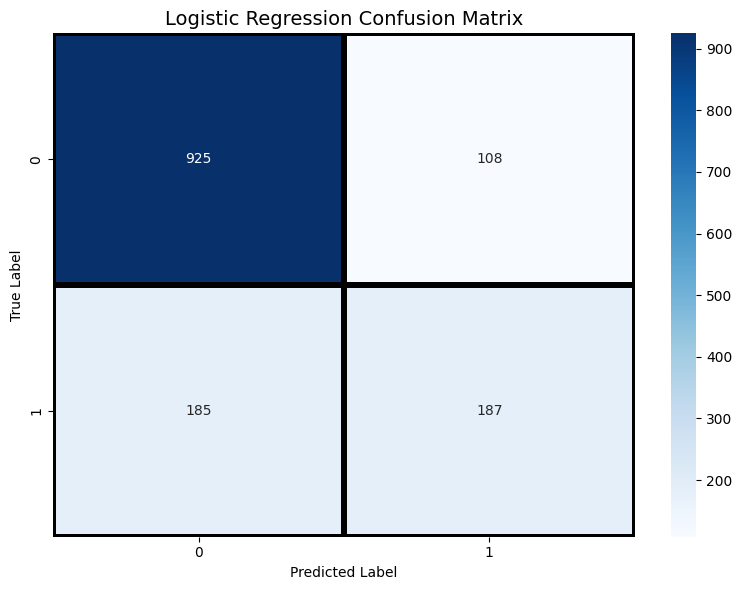

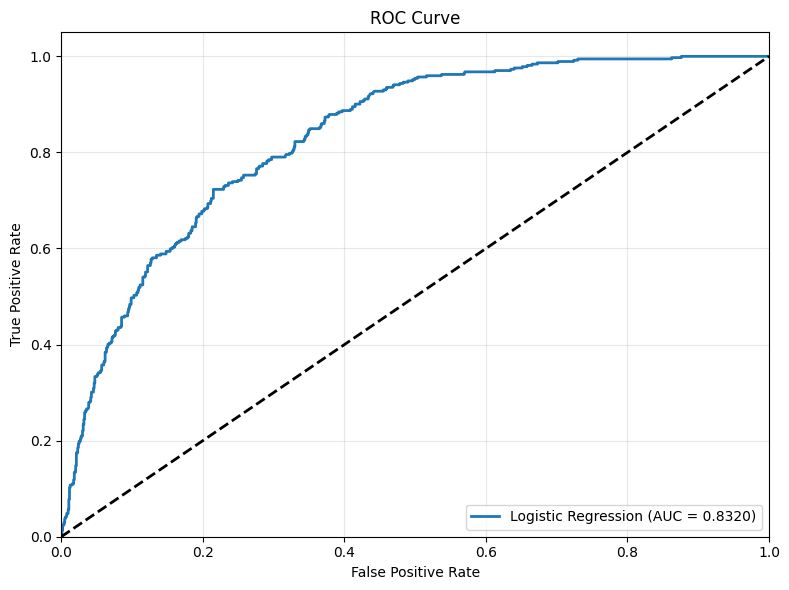

In [46]:
best_model_name = "Logistic Regression" # F1 and ROC-AUC high
best_model = models_cv[best_model_name]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"\n{best_model_name} Test Accuracy: {accuracy:.4f}")
print(report)

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', linecolor='k', linewidths=3, cmap='Blues')
plt.title(f'{best_model_name} Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{best_model_name} (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## COST-SENSITIVE ALGORITHM

In [47]:
models_cv_cs = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42) # don't have
}

cv_cs_results = {}
for name, model in models_cv_cs.items():
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=CV, scoring='accuracy')
    f1_scores = cross_val_score(model, X_train, y_train, cv=CV, scoring='f1') # class 1 
    f1_macro_scores = cross_val_score(model, X_train, y_train, cv=CV, scoring='f1_macro') # class 0 - 1
    roc_auc_scores = cross_val_score(model, X_train, y_train, cv=CV, scoring='roc_auc')
    cv_cs_results[name] = {
        'accuracy_mean': np.mean(accuracy_scores),
        'accuracy_std': np.std(accuracy_scores),
        'roc_auc_mean': np.mean(roc_auc_scores),
        'roc_auc_std': np.std(roc_auc_scores),
        'f1_mean': np.mean(f1_scores),
        'f1_std': np.std(f1_scores),
        'f1_macro_mean': np.mean(f1_macro_scores),
        'f1_macro_std': np.std(f1_macro_scores)
    }

In [48]:
show_cv_table(cv_cs_results, "COST SENSITIVE ALGORITHM")

Model,Accuracy,ROC AUC,F1 (class 1),F1 Macro
Logistic Regression,0.7382 ± 0.0112,0.8360 ± 0.0140,0.6184 ± 0.0138,0.7096 ± 0.0114
Random Forest,0.7739 ± 0.0081,0.8006 ± 0.0128,0.5133 ± 0.0195,0.6830 ± 0.0121
Gradient Boosting,0.7949 ± 0.0130,0.8354 ± 0.0154,0.5747 ± 0.0287,0.7197 ± 0.0183



Logistic Regression Test Accuracy: 0.7281
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1033
           1       0.49      0.77      0.60       372

    accuracy                           0.73      1405
   macro avg       0.69      0.74      0.70      1405
weighted avg       0.79      0.73      0.74      1405



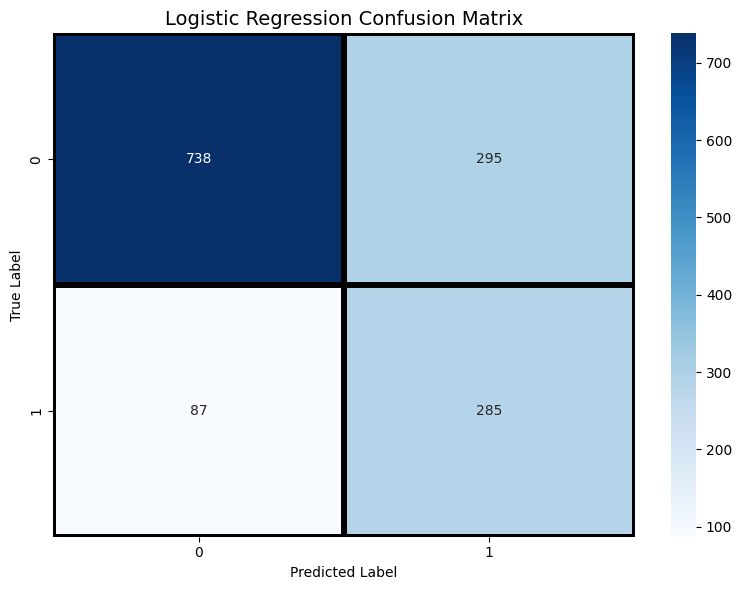

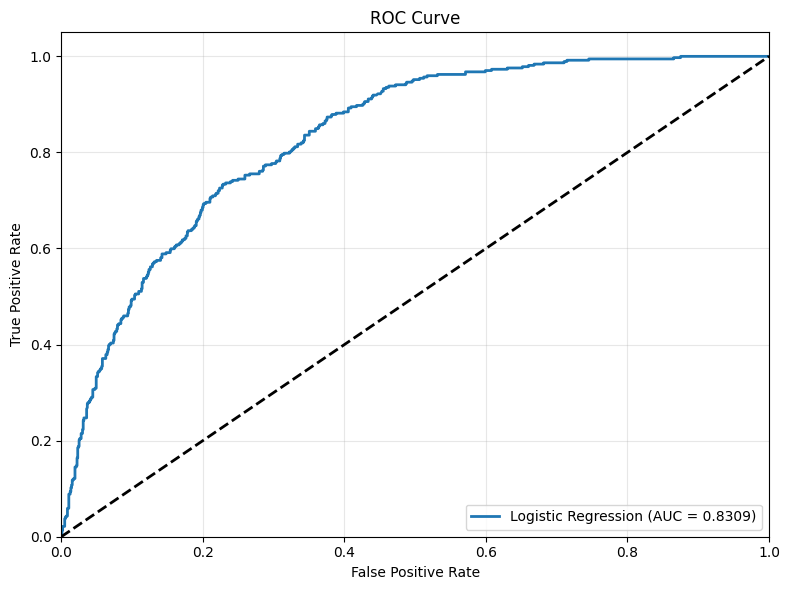

In [49]:
best_model_name = "Logistic Regression" # F1 and ROC-AUC high
best_model = models_cv_cs[best_model_name]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"\n{best_model_name} Test Accuracy: {accuracy:.4f}")
print(report)

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', linecolor='k', linewidths=3, cmap='Blues')
plt.title(f'{best_model_name} Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{best_model_name} (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## SMOTE (ratio 0.8)

In [50]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False,)
    return(vif)

In [51]:
X_train_smote = X_train.copy()
y_train_smote = y_train.copy()
print(X_train_smote.shape, y_train_smote.shape)

(5616, 25) (5616,)


In [52]:
# SMOTE to oversampling the minority class (1)
print("Before OverSampling - counts of label '1': {}".format(sum(y_train_smote==1)))
print("Before OverSampling - counts of label '0': {} \n".format(sum(y_train_smote==0)))
print("*******************************************************************\n")

sm = SMOTE(random_state=42, sampling_strategy=0.8)
X_train_smote, y_train_smote = sm.fit_resample(X_train_smote, y_train_smote.ravel())

print('After OverSampling with SMOTE - x_train: {}'.format(X_train_smote.shape))
print('After OverSampling with SMOTE - y_train: {} \n'.format(y_train_smote.shape))

print("After OverSampling with SMOTE - counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling with SMOTE - counts of label '0': {}".format(sum(y_train_smote==0)))

Before OverSampling - counts of label '1': 1485
Before OverSampling - counts of label '0': 4131 

*******************************************************************

After OverSampling with SMOTE - x_train: (7435, 25)
After OverSampling with SMOTE - y_train: (7435,) 

After OverSampling with SMOTE - counts of label '1': 3304
After OverSampling with SMOTE - counts of label '0': 4131


In [53]:
sfs = SFS(GradientBoostingClassifier(n_estimators=100, random_state=42),
          k_features = 9, #choose 9 features
          forward= True,
          floating = True,
          verbose= 2,
          scoring= 'f1_macro', # maximize both class balance
          cv = CV,
          n_jobs= -1).fit(X_train_smote, y_train_smote) #SFFS

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.6s finished

[2025-06-15 09:45:07] Features: 1/9 -- score: 0.70932225486431[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    8.4s finished

[2025-06-15 09:45:15] Features: 2/9 -- score: 0.7380624454034578[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:   16.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.9s finished

[2025-06-15 09:45:34] Features: 3/9 -- score: 0.7515901106644385[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:   17.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent worke

In [54]:
print("Feature Names: ",sfs.k_feature_names_)
print("*****************************************")
print("Score: ", sfs.k_score_)

Feature Names:  ('Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'MonthlyCharges', 'Contract_Month-to-month', 'PaymentMethod_Electronic check')
*****************************************
Score:  0.7820279956715493


In [55]:
selected_cols = list(sfs.k_feature_names_)
selected_cols

['Dependents',
 'tenure',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'MonthlyCharges',
 'Contract_Month-to-month',
 'PaymentMethod_Electronic check']

In [56]:
X_train_smote = X_train_smote[selected_cols]
X_test_smote = X_test[selected_cols]

In [57]:
checkVIF(X_train_smote).reset_index(drop=True)

,Features,VIF
0,PhoneService,5.04
1,Contract_Month-to-month,3.66
2,tenure,2.77
3,PaymentMethod_Electronic check,1.97
4,OnlineBackup,1.94
5,TechSupport,1.66
6,OnlineSecurity,1.64
7,Dependents,1.46
8,MonthlyCharges,1.32


In [58]:
models_cv_smote = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


cv_results_smote = {}
for name, model in models_cv_smote.items():
    accuracy_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=CV, scoring='accuracy')
    f1_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=CV, scoring='f1') # class 1 
    f1_macro_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=CV, scoring='f1_macro') # class 0 - 1
    roc_auc_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=CV, scoring='roc_auc')
    cv_results_smote[name] = {
        'accuracy_mean': np.mean(accuracy_scores),
        'accuracy_std': np.std(accuracy_scores),
        'roc_auc_mean': np.mean(roc_auc_scores),
        'roc_auc_std': np.std(roc_auc_scores),
        'f1_mean': np.mean(f1_scores),
        'f1_std': np.std(f1_scores),
        'f1_macro_mean': np.mean(f1_macro_scores),
        'f1_macro_std': np.std(f1_macro_scores)
    }

In [59]:
show_cv_table(cv_results_smote, "SMOTE")

Model,Accuracy,ROC AUC,F1 (class 1),F1 Macro
Logistic Regression,0.7774 ± 0.0067,0.8537 ± 0.0061,0.7544 ± 0.0080,0.7754 ± 0.0069
Random Forest,0.7525 ± 0.0037,0.8335 ± 0.0072,0.7145 ± 0.0068,0.7480 ± 0.0041
Gradient Boosting,0.7844 ± 0.0097,0.8596 ± 0.0087,0.7593 ± 0.0122,0.7820 ± 0.0100



Gradient Boosting Test Accuracy: 0.7687
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1033
           1       0.55      0.67      0.61       372

    accuracy                           0.77      1405
   macro avg       0.71      0.74      0.72      1405
weighted avg       0.79      0.77      0.78      1405



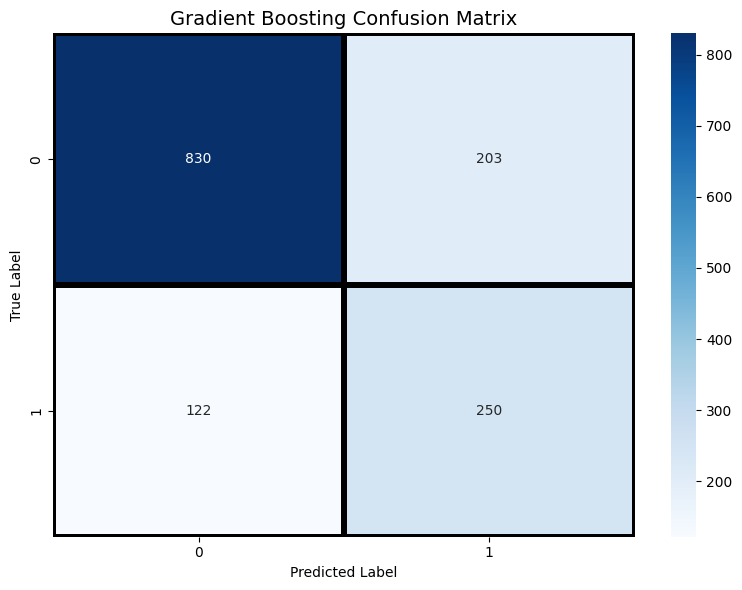

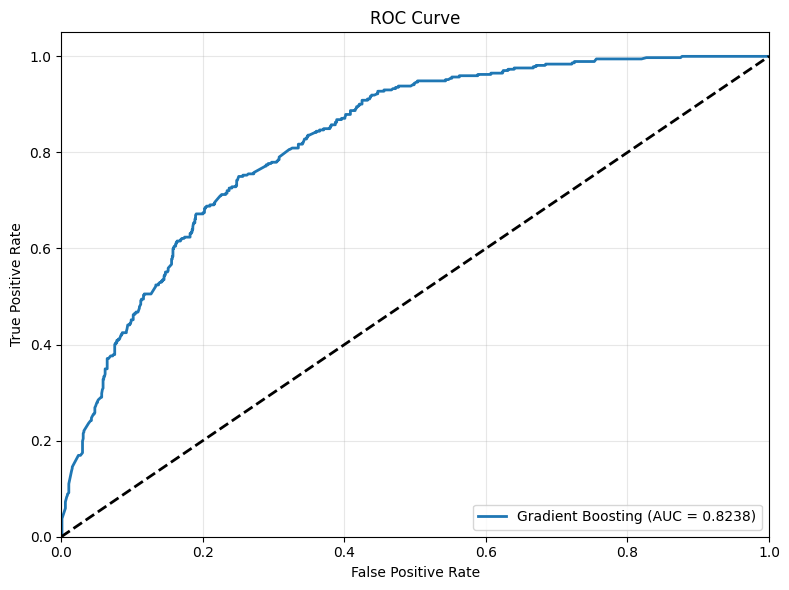

In [60]:
best_model_name = "Gradient Boosting" # F1 and ROC-AUC high
best_model = models_cv_smote[best_model_name]
best_model.fit(X_train_smote, y_train_smote)

y_pred = best_model.predict(X_test_smote)
y_pred_prob = best_model.predict_proba(X_test_smote)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"\n{best_model_name} Test Accuracy: {accuracy:.4f}")
print(report)

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', linecolor='k', linewidths=3, cmap='Blues')
plt.title(f'{best_model_name} Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'{best_model_name} (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Final
- Without applying any balance technique, the linear model shows no overfit rate, high roc_auc (83.2%) however the recall rate for class 1 is so low, just about 50%
- Regarding cost-sensitive algorithms (linear) -> the recall score for class 1 is impressive with 77%, f1 score for class 1 is higher than 4%, however the class 0 recall rate is lower at 71% -> this model is good for class 1 capturing
- The last one is SMOTE, if we oversampling the minor class to 80% of amount of class 0 -> all the models get higher f1-score for class 1, and the gradient boosting give us a moderate f1-score for class 1 about 61% while it still remains the high precison and recall rate of class 0 (87% precision and 80% recall) -> this choice is balance for class 0 and class 1 - but we see the overfit problem is kinda extreme for class 1 prediction